In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mdf= pd.read_csv('/content/insurance.csv')

In [ ]:
mdf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
mdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EDA**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mdf.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(mdf,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

In [ ]:
fig = px.histogram(mdf,
                   x = 'bmi',
                   marginal='box',
                   title='BMI Distribution')
fig.update_layout(bargap=0.05)
fig.show()

**To distinguish the charges for smokers and non-smokers**

<Axes: xlabel='charges', ylabel='Count'>

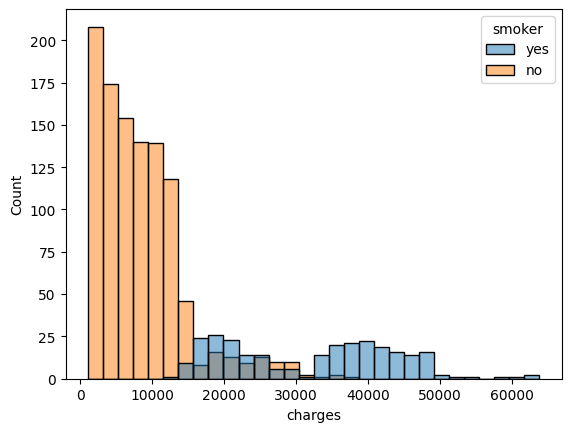

In [ ]:
sns.histplot(mdf, x='charges',hue='smoker')

In [ ]:
fig = px.histogram(mdf,
             x='charges',

             title = 'Annual charges',
             color='smoker')
fig.update_layout(bargap=0.05)
fig.show()

In [ ]:
px.histogram(mdf, x='smoker',color='sex')

In [ ]:
px.scatter(mdf,
           x ='age',
           y = 'charges',
           color='smoker',
           title = 'Age VS charges')

In [ ]:
px.scatter(mdf,
           x = 'bmi',
           y ='charges',
           color = 'smoker',
           title = 'BMI VS charges')

In [ ]:
mdf.charges.corr(mdf.age)

np.float64(0.2990081933306476)

In [ ]:
mdf.charges.corr(mdf.bmi)

np.float64(0.19834096883362895)

In [ ]:
mdf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
smoker_val = {'no':0,'yes':1}
smoker_num = mdf.smoker.map(smoker_val)
mdf.charges.corr(smoker_num)

np.float64(0.787251430498478)

In [ ]:
non_smoker_df = mdf[mdf.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='age', ylabel='charges'>

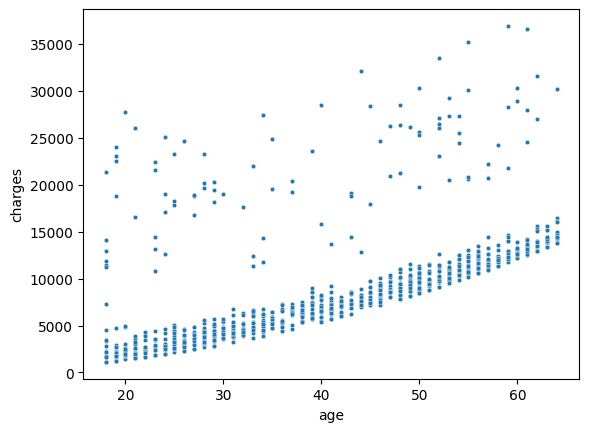

In [ ]:
sns.scatterplot(data=non_smoker_df, x='age',y='charges',s=10)

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

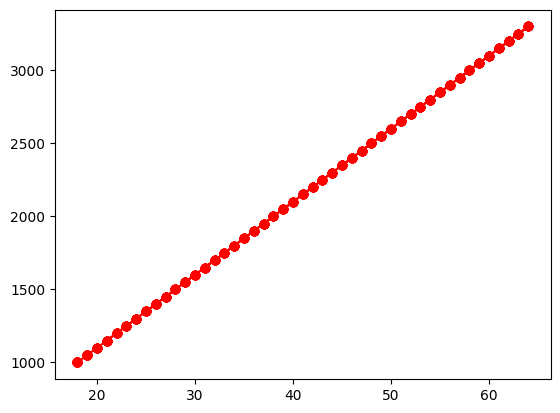

In [ ]:
plt.plot(ages,estimated_charges, 'r-o')

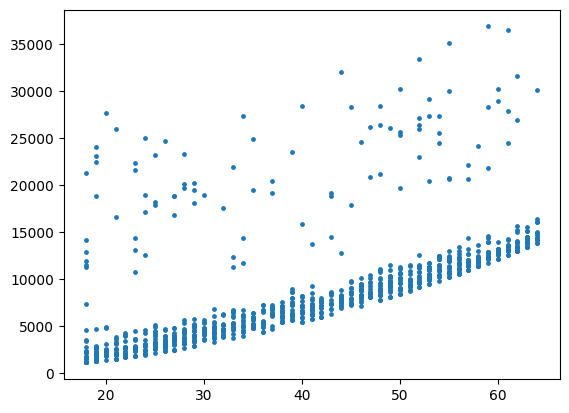

In [ ]:
target = non_smoker_df.charges
plt.scatter(ages,target,s=6)

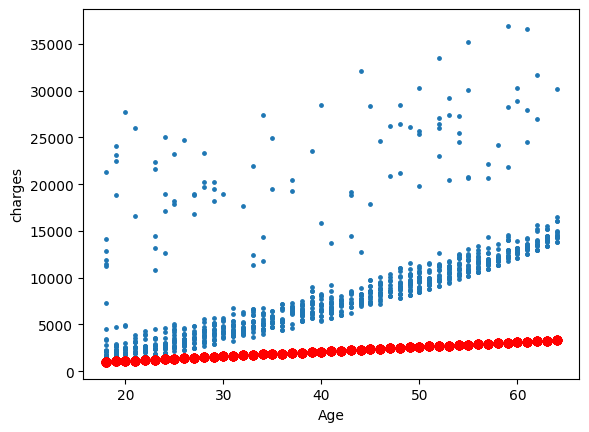

In [ ]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
plt.scatter(ages,target,s=6)
plt.xlabel('Age');
plt.ylabel("charges");

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(ages,target,s=6)
  plt.xlabel('Age');
  plt.ylabel("charges");

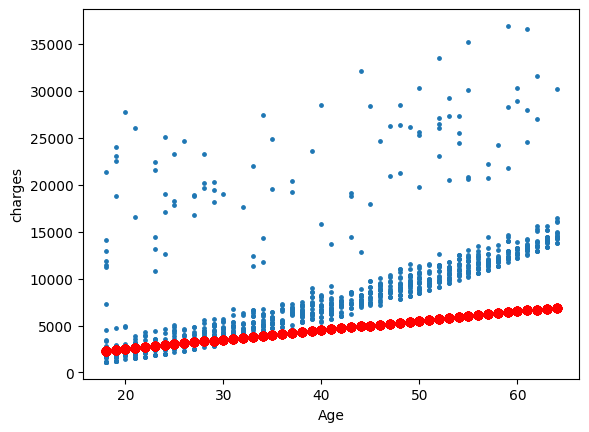

In [ ]:
try_parameters(100, 500)

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

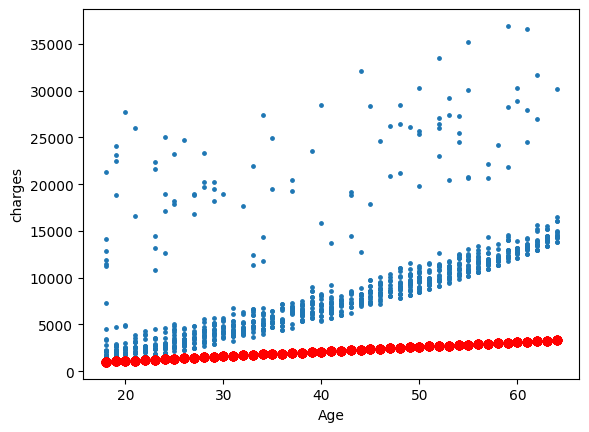

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 8461.949562575493


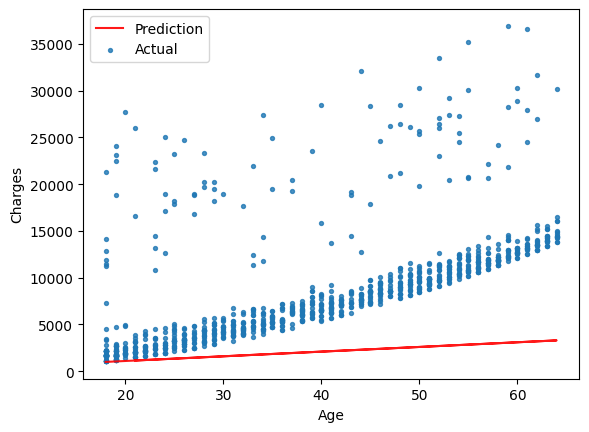

In [ ]:
try_parameters(50, 100)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model

LinearRegression()

In [ ]:

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Inputs.Shape:',inputs.shape)
print('Targets.Shape:',targets.shape)

Inputs.Shape: (1064, 1)
Targets.Shape: (1064,)


In [ ]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                       [50],
                       [60]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855, 11271.02508499, 13943.51421331])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

In [ ]:
model.coef_

array([267.24891283])

RMSE LOSS: 4662.505766636395


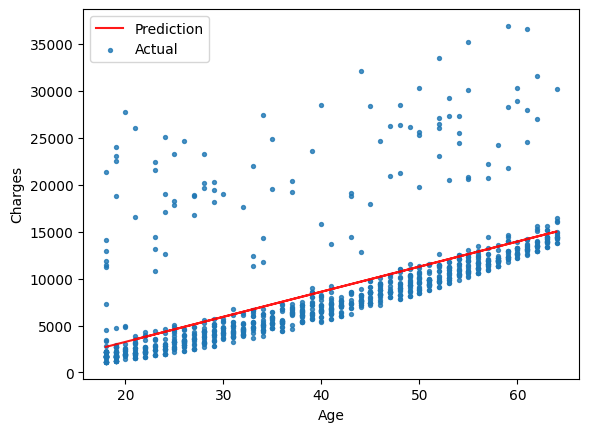

In [ ]:
try_parameters(model.coef_, model.intercept_)